In [1]:
#Code reference from https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233
#Using a Keras LSTM deep learning model for stock price prediction for Q1 2020
####
# Not sure if without quality data, is there any possibility of predicting 
# Importing all external packages

#pip install tensorflow  #UNCOMMENT this part only for the first time use
#pip install yfinance    #UNCOMMENT this part only for the first time use

import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM , Dropout, Dense
import yfinance as yf

#Path for the data files and most of the variable declaration
path = "/Users/ankanghosh/Downloads/Semester III/Analytics & Value Creation/ABT_stockprice.csv" #Change this path according your data

In [2]:
dataset_train = pd.read_csv(path)
dataset_train = dataset_train.rename(columns = {'modified_date':'Date'}).rename(columns = {'Adj_Close':'Adj Close'})

In [3]:
ABT_test = yf.download('ABT', '2020-01-01', '2020-03-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
train_data = dataset_train[dataset_train['Date']<'2019-12-31'].copy()
test_data = ABT_test.copy()

In [5]:
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,38.380001,38.570000,38.220001,38.330002,33.394047,4594200
1,2014-01-02,38.090000,38.400002,38.000000,38.230000,33.306915,4967500
2,2014-01-03,38.369999,38.779999,38.270000,38.639999,33.664124,4301600
3,2014-01-06,39.189999,39.689999,39.110001,39.150002,34.108452,10130400
4,2014-01-07,39.230000,39.349998,38.740002,38.849998,33.847088,8329300
...,...,...,...,...,...,...,...
1505,2019-12-23,86.309998,87.459999,86.279999,87.349998,86.280869,4067800
1506,2019-12-24,87.370003,87.480003,86.980003,87.279999,86.211723,1067700
1507,2019-12-26,87.209999,87.519997,86.879997,87.279999,86.211723,2033100
1508,2019-12-27,87.489998,87.750000,87.019997,87.400002,86.330261,2508100


In [6]:
data_training = train_data.drop(['Date', 'Adj Close'], axis = 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training = scaler.fit_transform(data_training)

In [8]:
X_train = []
y_train = []
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
y_train.shape, y_train.shape

((1450, 5), (1450, 5))

In [10]:
#LSTM model
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 5))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [11]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 3s 67ms/step - loss: 0.0361
Epoch 2/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0073
Epoch 3/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0054
Epoch 4/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0048
Epoch 5/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0048
Epoch 6/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0046
Epoch 7/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0039
Epoch 8/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0037
Epoch 9/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0037
Epoch 10/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0033
Epoch 11/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0035
Epoch 12/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0034
Epoch 13/100
46/46 [=====

In [12]:
y_train.shape, X_train.shape

((1450, 5), (1450, 60, 5))

In [13]:
past_60_days = train_data.tail(60)
df = past_60_days.append(test_data, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,81.300003,82.320000,81.290001,81.989998,3390100
1,81.400002,81.980003,80.970001,81.040001,2673200
2,80.559998,80.559998,78.510002,78.510002,5924200
3,79.309998,79.809998,78.879997,79.500000,4008500
4,79.089996,80.459999,79.070000,80.139999,5085000


In [14]:
#inputs = df.to_numpy()
inputs = scaler.transform(df)
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, :])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((62, 60, 5), (62, 5))

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred_test = scaler.inverse_transform(y_pred)
df2 = pd.DataFrame(data =y_pred_test,columns=['Open','High','Low','Close','Volume'])
df2['Date'] = test_data.index

In [43]:
df2.to_csv('/Users/ankanghosh/Downloads/Semester III/ABT.csv')

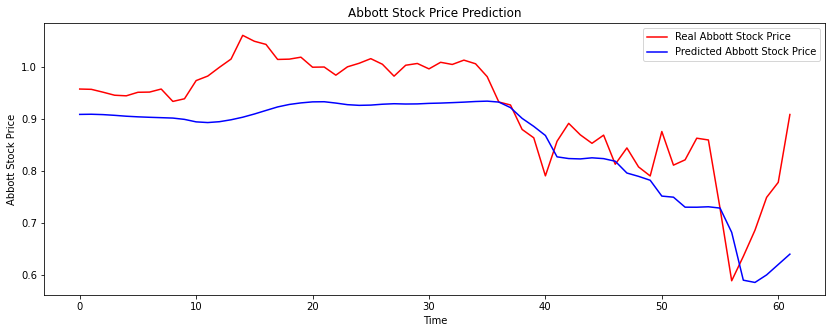

In [17]:
## Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:,1:2], color = 'red', label = 'Real Abbott Stock Price')
plt.plot(y_pred[:,1:2], color = 'blue', label = 'Predicted Abbott Stock Price')
plt.title('Abbott Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Abbott Stock Price')
plt.legend()
plt.show()

## Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Glaxosmithkline Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Glaxosmithkline Stock Price')
plt.title('Glaxosmithkline Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Glaxosmithkline Stock Price')
plt.legend()
plt.show()